In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/merged/ready_data.csv", parse_dates=["timestamp", "sunrise", "sunset", "extracted_at"])

month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]
df["month"] = pd.Categorical(df["month"], categories=month_order, ordered=True)


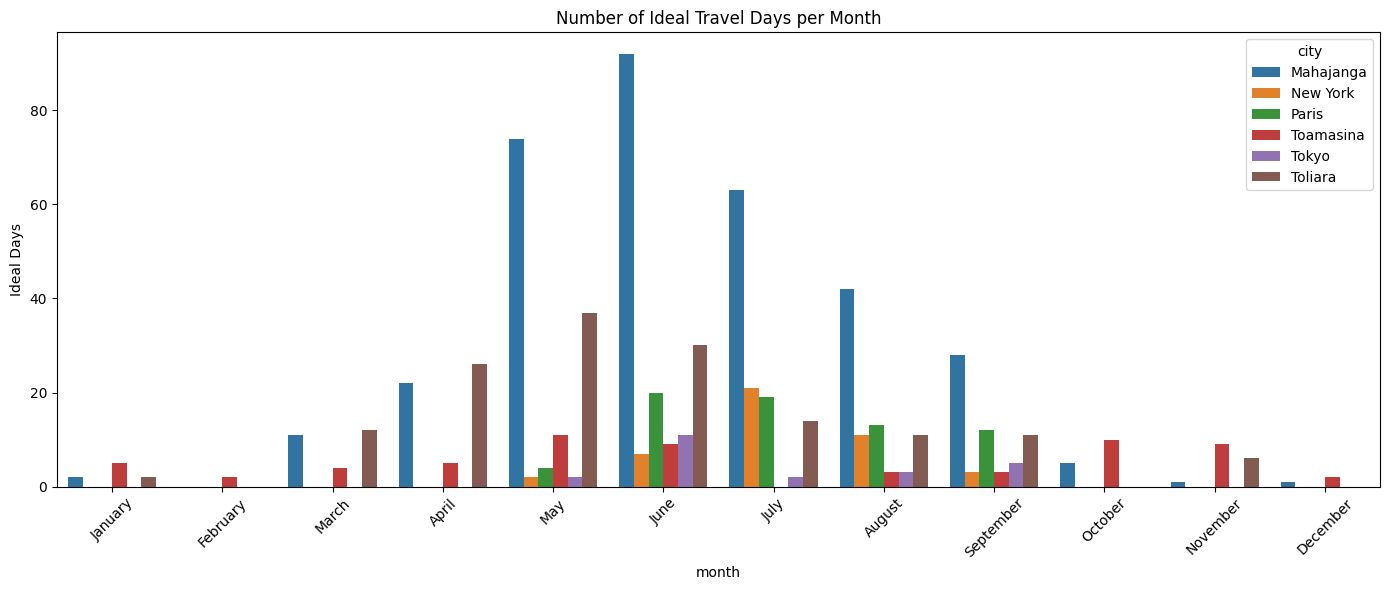

In [14]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df[df["is_ideal_day"]], x="month", hue="city")
plt.title("Number of Ideal Travel Days per Month")
plt.ylabel("Ideal Days")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


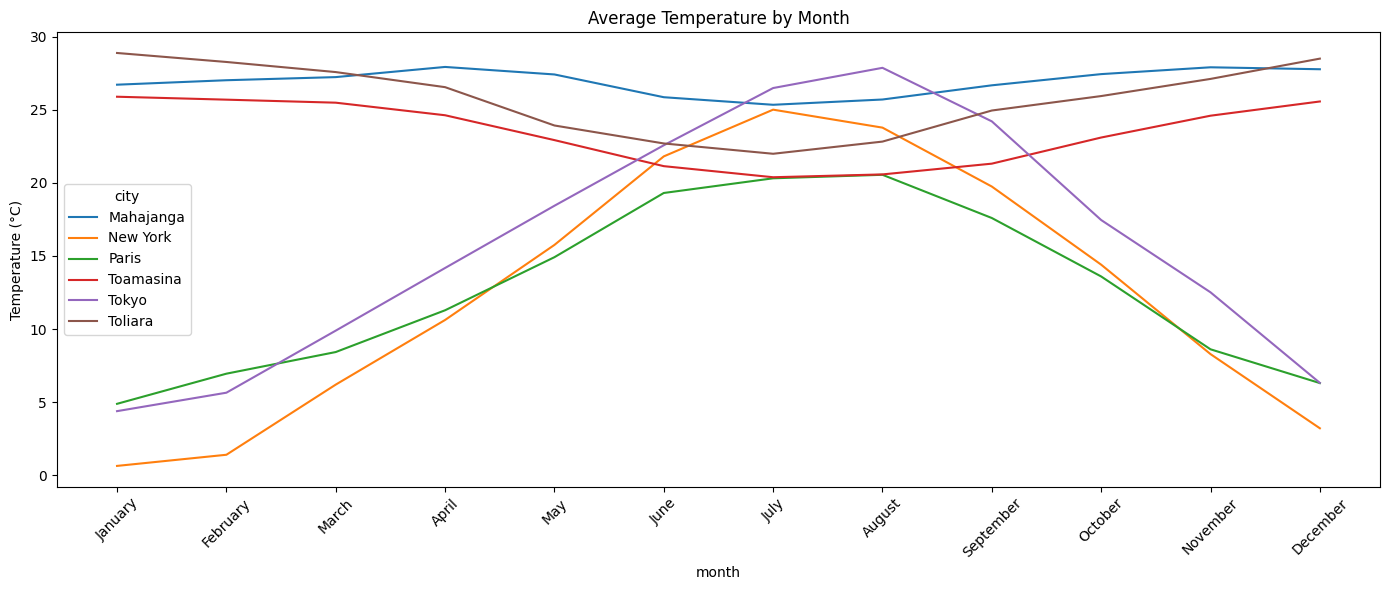

In [15]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x="month", y="temp_C", hue="city", estimator="mean", errorbar=None)
plt.title("Average Temperature by Month")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


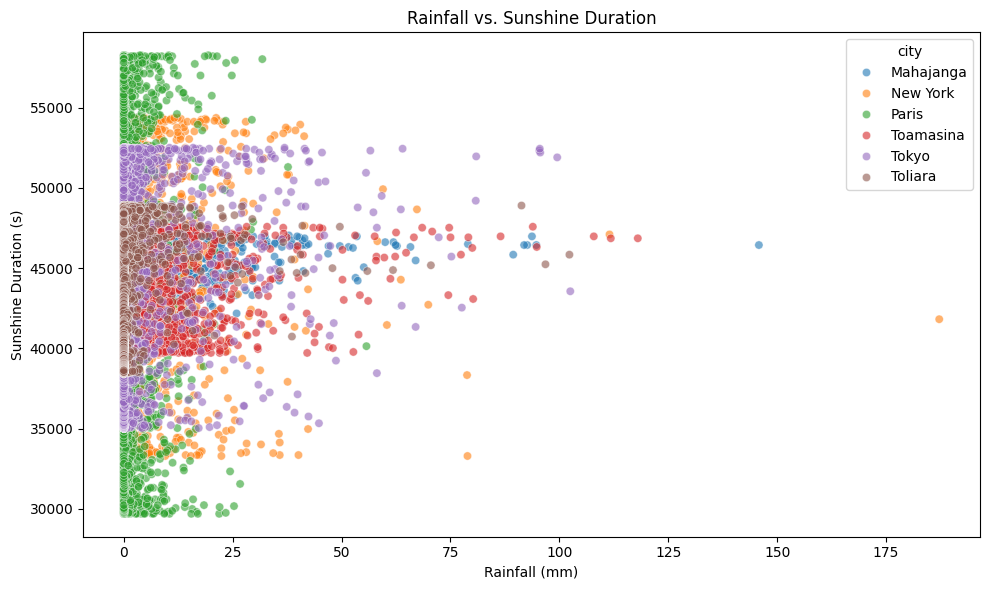

In [16]:
df["sunrise"] = pd.to_datetime(df["sunrise"])
df["sunset"] = pd.to_datetime(df["sunset"])
df["sunshine_duration"] = (df["sunset"] - df["sunrise"]).dt.total_seconds()


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="rain_1d", y="sunshine_duration", hue="city", alpha=0.6)
plt.title("Rainfall vs. Sunshine Duration")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Sunshine Duration (s)")
plt.tight_layout()
plt.show()


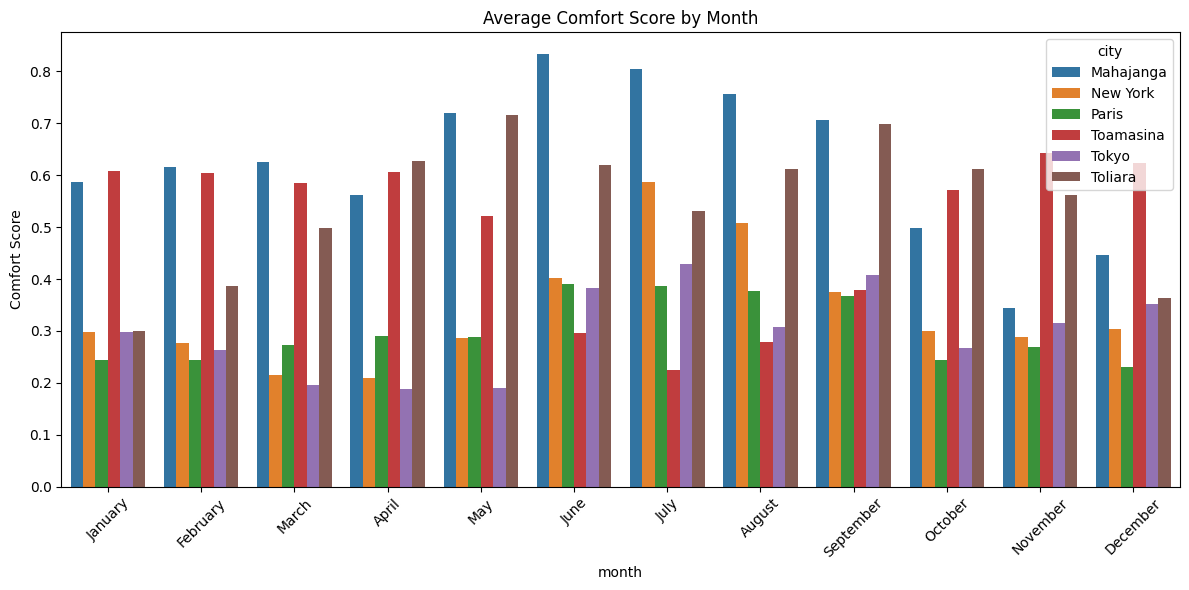

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="month", y="comfort_score", hue="city", estimator="mean", errorbar=None)
plt.title("Average Comfort Score by Month")
plt.ylabel("Comfort Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


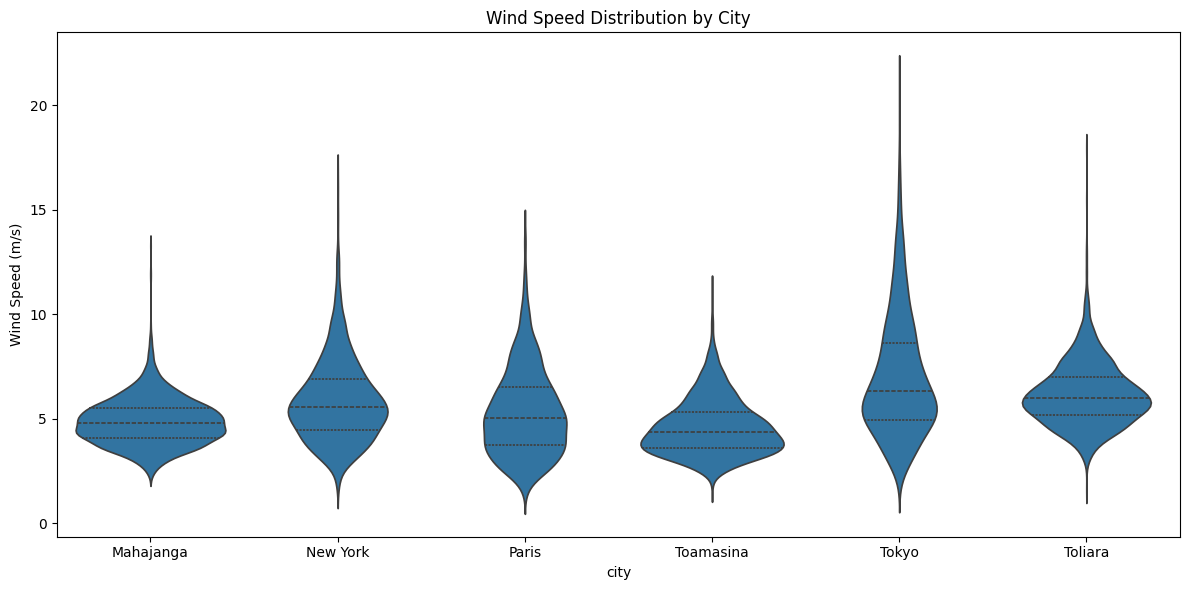

In [22]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x="city", y="wind_speed", inner="quartile")
plt.title("Wind Speed Distribution by City")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout()
plt.show()


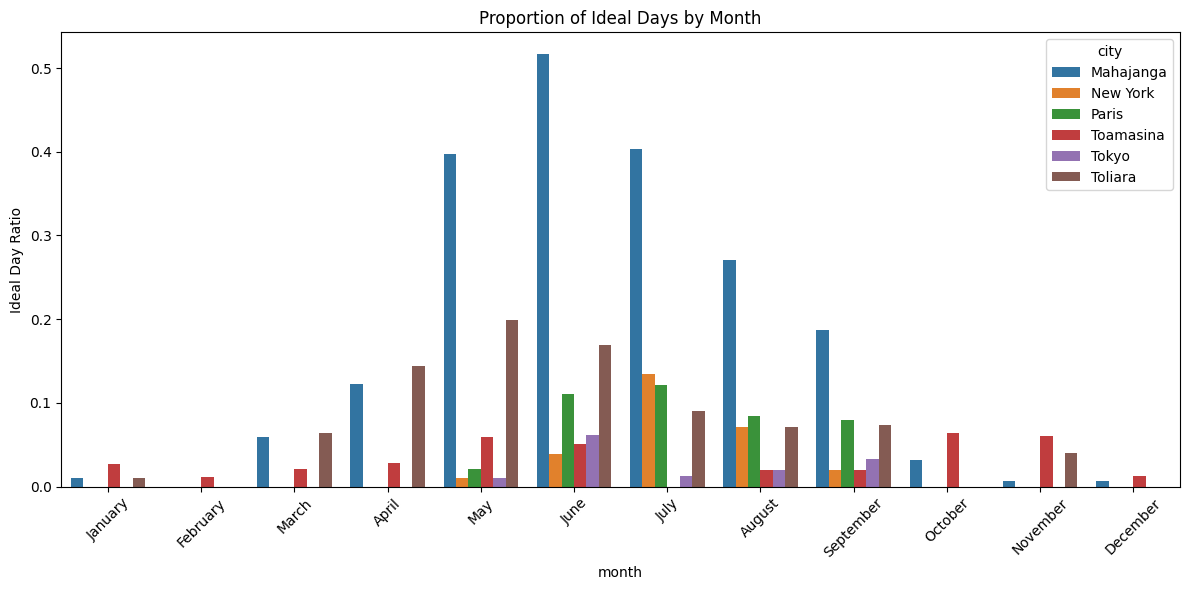

In [26]:
ideal_ratio = (
    df.groupby(["city", "month"], observed=False)["is_ideal_day"]
    .mean()
    .reset_index()
    .rename(columns={"is_ideal_day": "ideal_day_ratio"})
)


plt.figure(figsize=(12, 6))
sns.barplot(data=ideal_ratio, x="month", y="ideal_day_ratio", hue="city")
plt.title("Proportion of Ideal Days by Month")
plt.ylabel("Ideal Day Ratio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


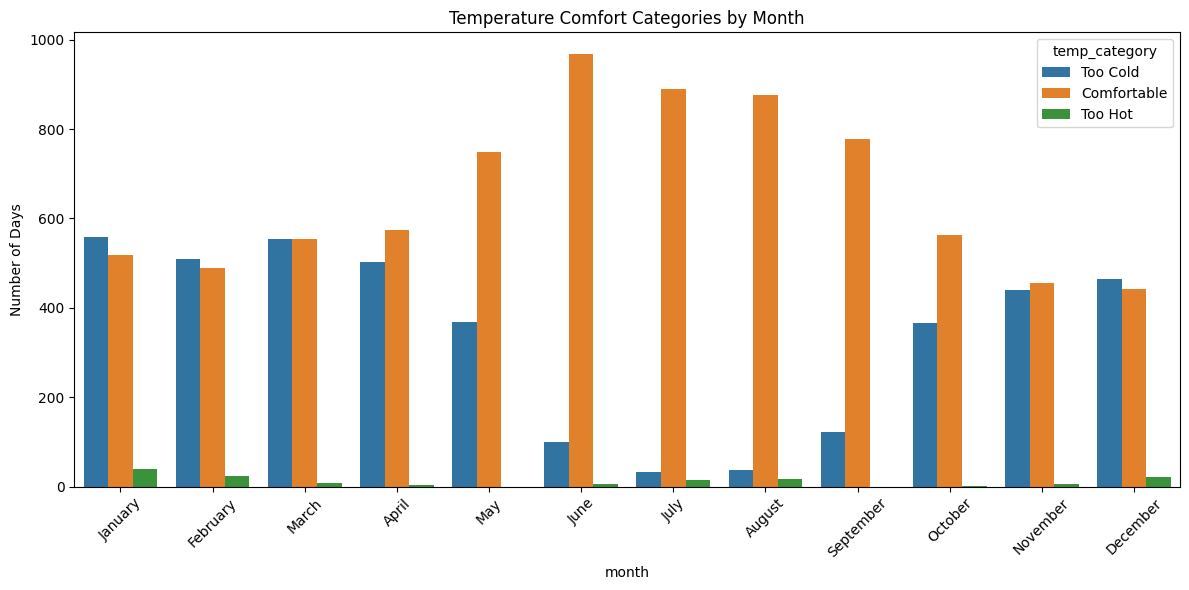

In [30]:
df["temp_category"] = pd.cut(df["temp_C"], bins=[-float("inf"), 18, 30, float("inf")], labels=["Too Cold", "Comfortable", "Too Hot"])

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="month", hue="temp_category")
plt.title("Temperature Comfort Categories by Month")
plt.ylabel("Number of Days")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


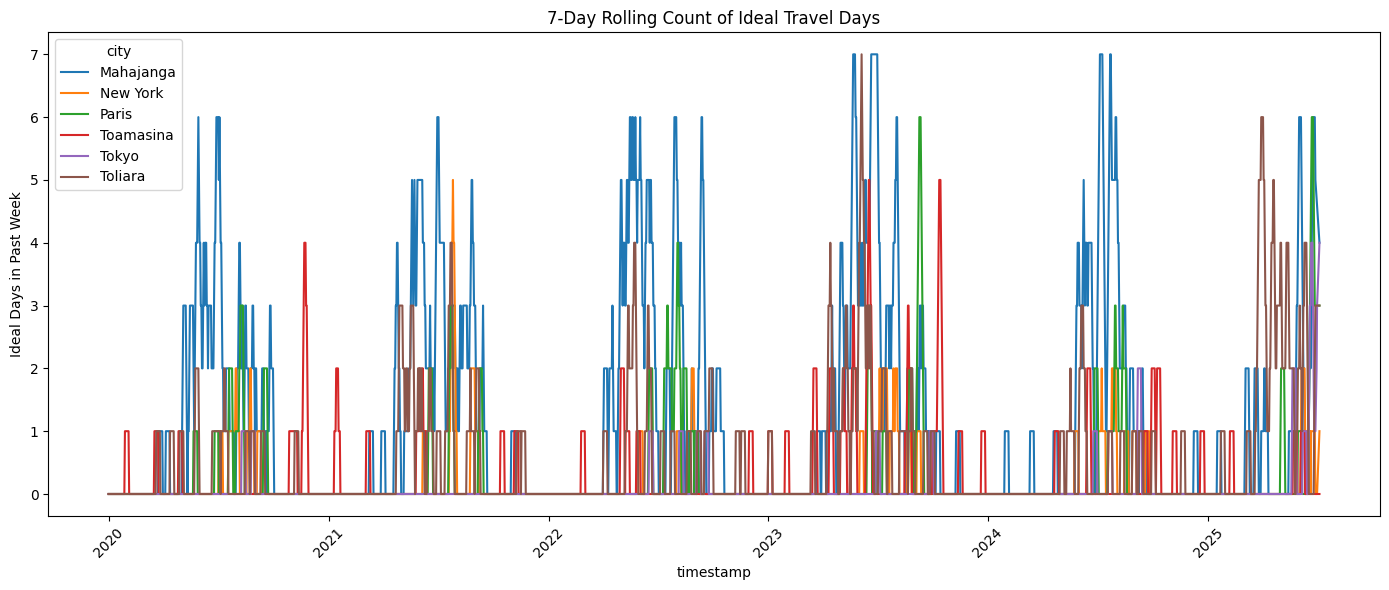

In [32]:
df["ideal_rolling_7"] = df.groupby("city")["is_ideal_day"].transform(lambda x: x.rolling(7, min_periods=1).sum())

plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x="timestamp", y="ideal_rolling_7", hue="city")
plt.title("7-Day Rolling Count of Ideal Travel Days")
plt.ylabel("Ideal Days in Past Week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [33]:
import ipywidgets as widgets
from IPython.display import display

def plot_city_temp(city):
    city_df = df[df["city"] == city]

    plt.figure(figsize=(10, 5))
    sns.countplot(data=city_df, x="month", hue="temp_category", order=city_df["month"].unique())
    plt.title(f"Temperature Comfort Categories by Month – {city}")
    plt.ylabel("Number of Days")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

dropdown = widgets.Dropdown(options=sorted(df["city"].unique()), description="City:")
widgets.interact(plot_city_temp, city=dropdown)


interactive(children=(Dropdown(description='City:', options=('Mahajanga', 'New York', 'Paris', 'Toamasina', 'T…

<function __main__.plot_city_temp(city)>